<a href="https://colab.research.google.com/github/Trish-Pat/Final-Project-Data-Analytics/blob/main/Copy_of_AirBnB_Newyork_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model for Predicting the Room Type for Clients using the AirBnB Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Loading the dataset

df = pd.read_csv('C:/Users/NEONSOL/Downloads/airbnb_data_NY.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1970-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Defining the Problem

- The classification task is to classify the room type.
- Therefore, the target variable is the room type column and the features are the other columns that will be used to determine it.

### Exploratory Data Analysis

In [ ]:
#Getting the dimensions of the data

df.shape

(48884, 16)

# New section

There are 48884 rows and 16 columns

In [ ]:
#Checking for null values

df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

There are no null values

In [ ]:
#Checking for duplicates

df.duplicated().sum()

0

There are no duplicates

In [ ]:
#Getting summary statistics

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Geting the datatypes in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48884 entries, 0 to 48883
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48884 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48884 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  last_review                     

In [ ]:
#Categorizing the colums as either categorical or non-categorical

categorical= []
non_categorical = []

for i in df.columns:
  if df[i].dtype == 'object':
    categorical.append(i)
  else:
    non_categorical.append(i)

print('Categorical Columns:\n', categorical)
print('\nNon-Categorical Columns:\n', non_categorical)

Categorical Columns:
 ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']

Non-Categorical Columns:
 ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


## Visualizations

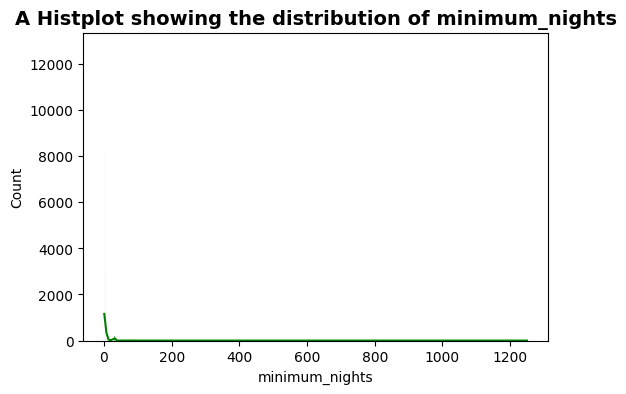

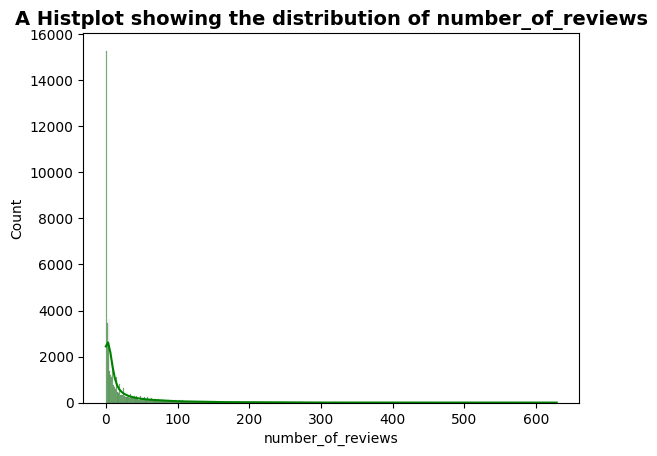

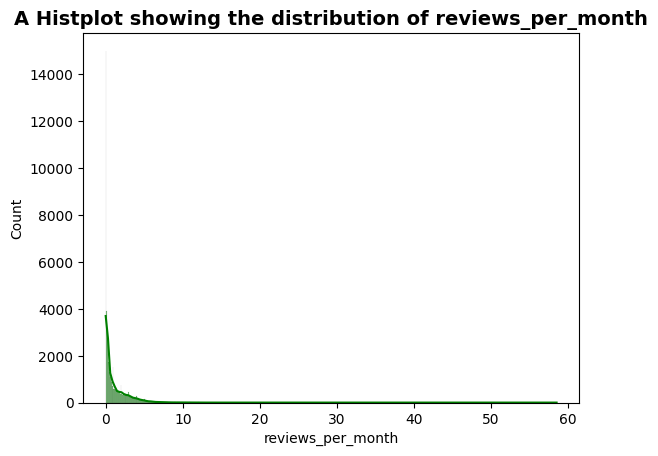

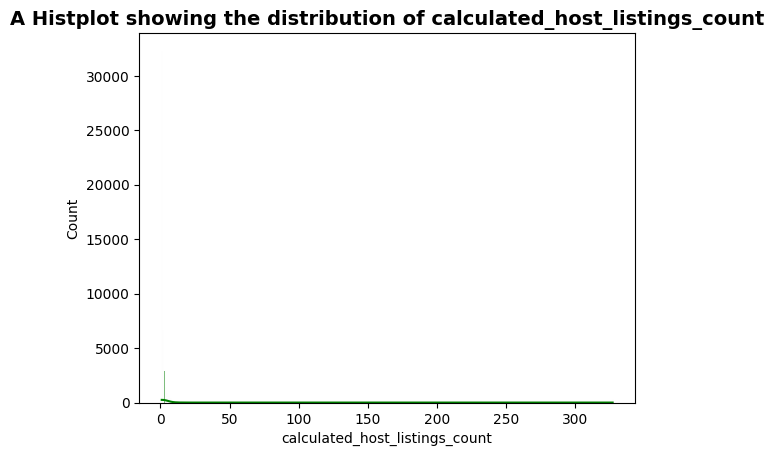

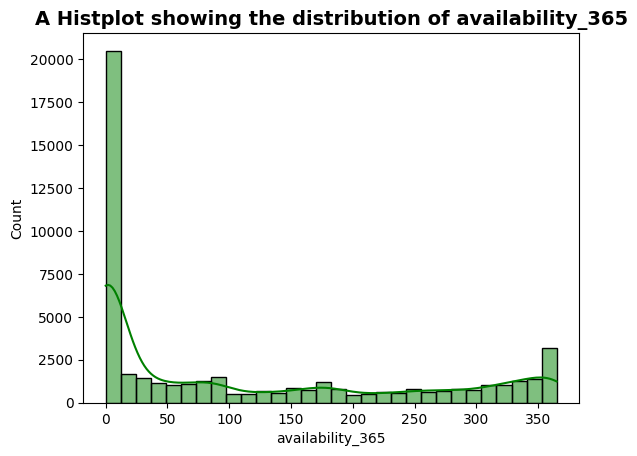

In [ ]:
#Univariate Visualizations

# Histograms

columns = ['minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']

plt.figure(figsize = (6,4))
for i in columns:

  sns.histplot(df[i], kde = True, color = 'green', edgecolor = 'black')
  plt.title(f'A Histplot showing the distribution of {i}', weight = 'bold', size = 14)
  plt.show()

- AirBnB bookers mostly stay for less than 10 minimum nights
- Most AirBnBs have reviews of less than 50
- Most AirBnBs have less than 3 reviews a month
- There is an even distribution of the number of calculated host listings
- Most AirBnBs are seen to have less than 10-days availability

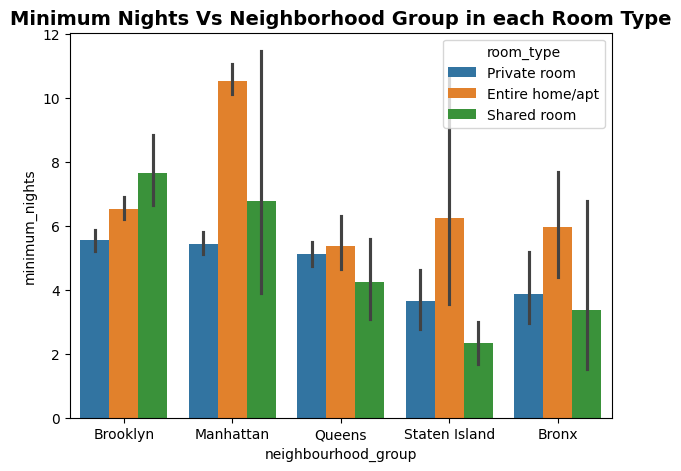

In [ ]:
#Multivariate Plots

#Barplot

plt.figure(figsize = (7,5))
sns.barplot(y = df['minimum_nights'], x = df['neighbourhood_group'], hue = df['room_type'])
plt.title('Minimum Nights Vs Neighborhood Group in each Room Type', weight = 'bold', size = 14)
plt.show()

- In brooklyn, most AirBnBs with approximately 6 minimum nights are private rooms, those with approximately 7 minimum nights are Entire homes/ Apartments, those with close to 8 minimum nights are shared rooms, thus shared rooms with close to 8 minimum nights are highly booked in Brooklyn.
- In Manhattan, most AirBnBs with approximately 6 minimum nights are private rooms, those with approximately 11 minimum nights are Entire homes/ Apartments, those with close to 7 minimum nights are shared rooms, thus Entire Homes with close to 11 minimum nights are highly booked in Manhattan.
- In Queens, most AirBnBs with approximately 6 minimum nights are private rooms and Entire homes/ Apartments, those with close to 5 minimum nights are shared rooms, thus Entire Homes with close to 6 minimum nights are highly booked in Queens.
- In Staten Island, most AirBnBs with approximately 4 minimum nights are private rooms, those with approximately 6 minimum nights are Entire homes/ Apartments, those with close to 2 minimum nights are shared rooms, thus Entire Homes with close to 6 minimum nights are highly booked in Staten Island.
- In Bronx, most AirBnBs with approximately 4 minimum nights are private rooms, those with approximately 6 minimum nights are Entire homes/ Apartments, those with close to 3 minimum nights are shared rooms, thus Entire Homes with close to 6 minimum nights are highly booked in Bronx.
- Overall, Entire Home apartments are seen to be higly boooked in most states.

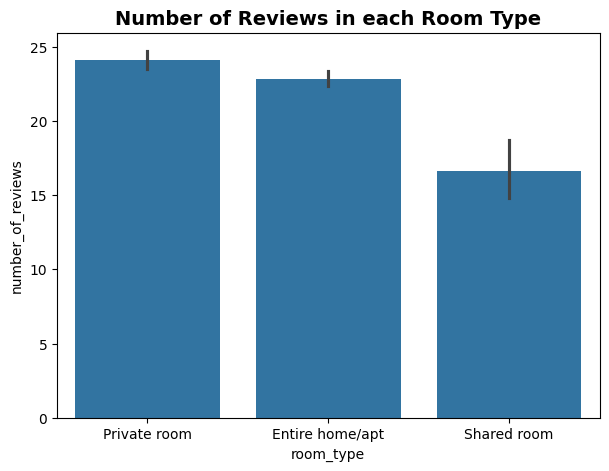

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(x = df['room_type'], y = df['number_of_reviews'])
plt.title('Number of Reviews in each Room Type', weight = 'bold', size = 14)
plt.show()

- Private Rooms are seen to have the highest number of reviews with approximately 24 reviews, followed by Entire Homes/ Apartments with just about 22.5 then shared rooms with approximately 16.5 reviews.

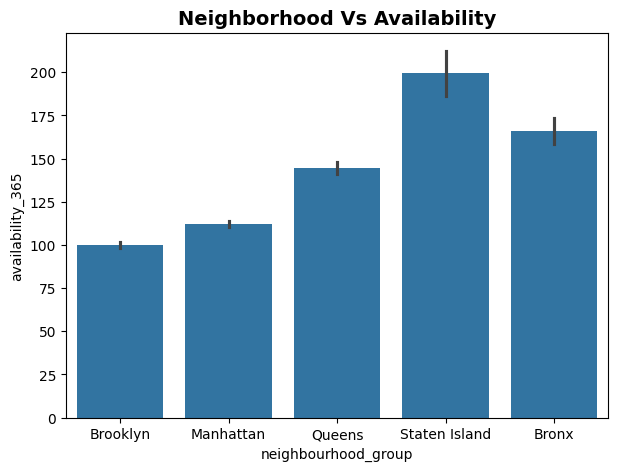

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(x = df['neighbourhood_group'], y = df['availability_365'])
plt.title('Neighborhood Vs Availability', weight = 'bold', size = 14)
plt.show()

- Staten Island is seen to have the highest availability of AirBnBs at approximately 200 and Brooklyn with the least at 100 listings.

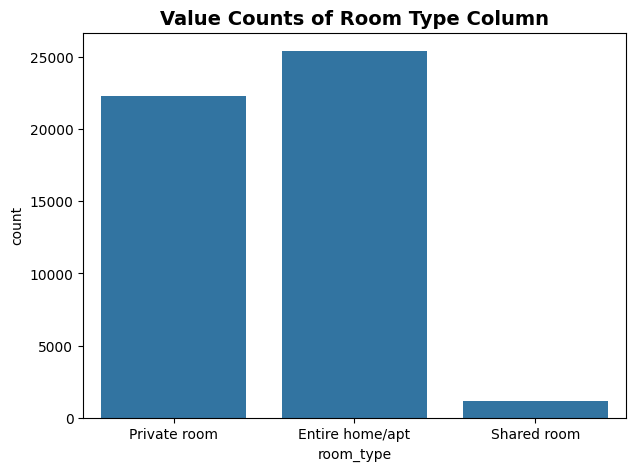

In [ ]:
#Countplot for the target variable

plt.figure(figsize = (7,5))
sns.countplot(x = df['room_type'])
plt.title('Value Counts of Room Type Column', weight = 'bold', size = 14)
plt.show()


- Entire Homes/ Apartments have the highest number of listings with approximately 25000, followed by private rooms with approximately 22500 units then lastly shared rooms at approximately 1500 listings.

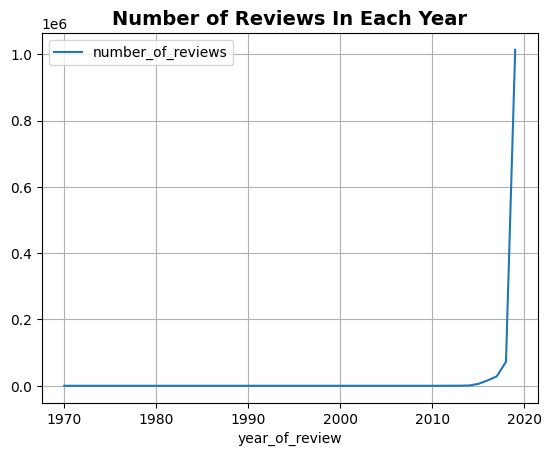

In [ ]:
# Line graph

df['year_of_review']= pd.DatetimeIndex(df['last_review']).year
df['month_of_review']= pd.DatetimeIndex(df['last_review']).month

pivot1 = pd.pivot_table(index = 'year_of_review', values = 'number_of_reviews', aggfunc = 'sum', data = df)
pivot2 = pd.pivot_table(index = 'month_of_review', values = 'availability_365', aggfunc = 'sum', data = df)


sns.lineplot(pivot1)
plt.title('Number of Reviews In Each Year', weight = 'bold', size = 14)
plt.grid()

plt.show()

- The number of reviews in each of the years has been increasing exponenmtailly since 2017.
- The year 1970 was likely used to replace reviews that weren't categorized.

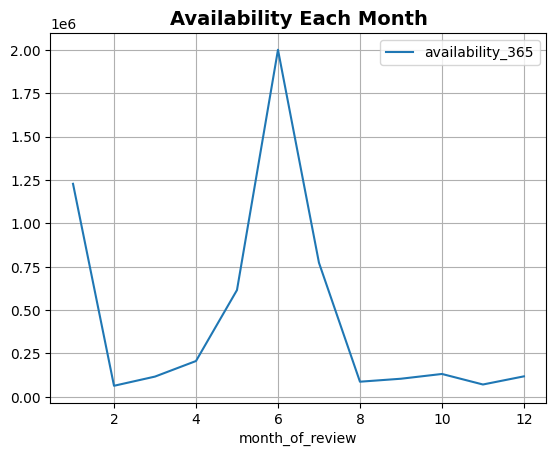

In [ ]:
sns.lineplot(pivot2)
plt.title('Availability Each Month', weight = 'bold', size = 14)
plt.grid()
plt.show()

-The month of June had the highest availability at 2 compared to the other months.

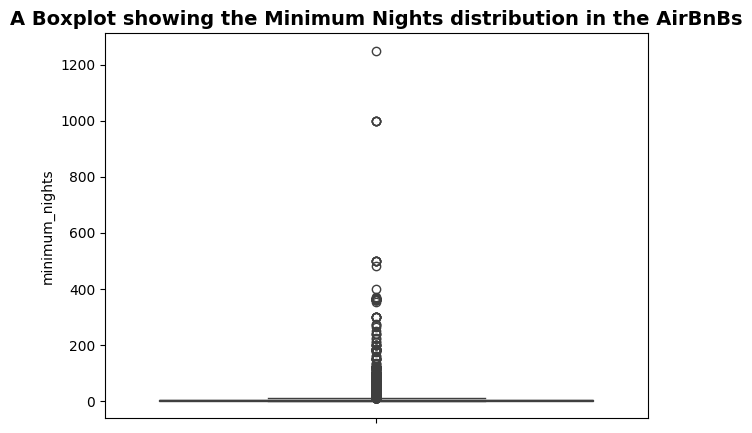

In [ ]:
#Boxplot

plt.figure(figsize=(7,5))
sns.boxplot(df['minimum_nights'])
plt.title('A Boxplot showing the Minimum Nights distribution in the AirBnBs', weight = 'bold', size = 14)
plt.show()

- The median number of minumum nights is 3.
- There are also some outliers that need to be removed.

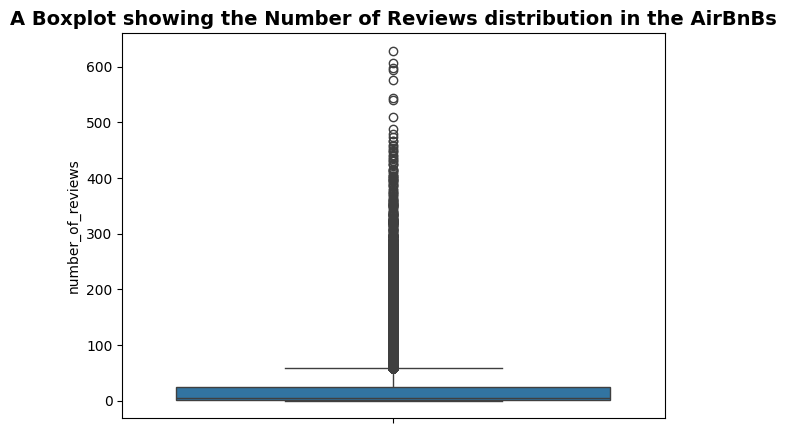

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(df['number_of_reviews'])
plt.title('A Boxplot showing the Number of Reviews distribution in the AirBnBs', weight = 'bold', size = 14)
plt.show()

- The median number of Reviews is 5.
- There are also some outliers that need to be removed.

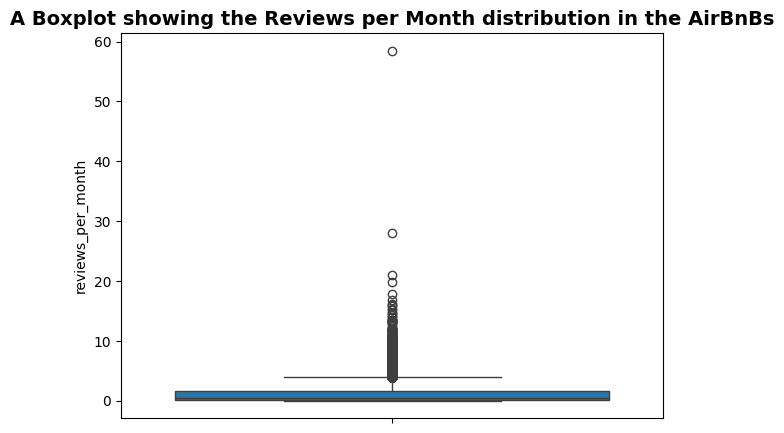

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(df['reviews_per_month'])
plt.title('A Boxplot showing the Reviews per Month distribution in the AirBnBs', weight = 'bold', size = 14)
plt.show()

- The median number of reviews per month is 0.3.
- There are also some outliers that need to be removed.

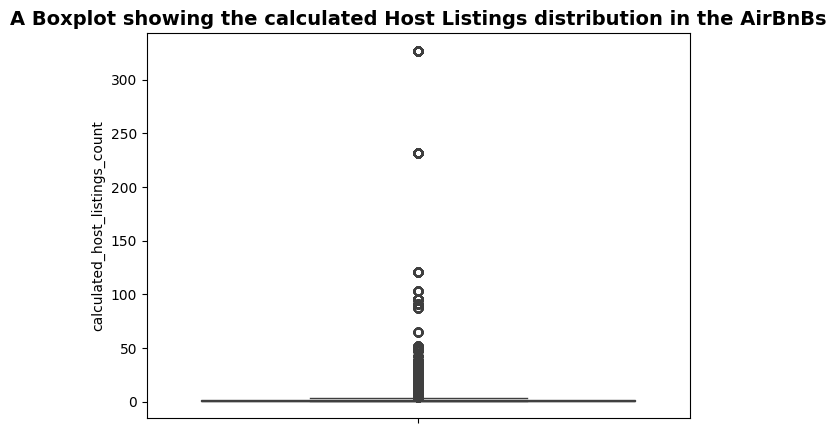

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(df['calculated_host_listings_count'])
plt.title('A Boxplot showing the calculated Host Listings distribution in the AirBnBs', weight = 'bold', size = 14)
plt.show()

 The column has a median of 1 with some outliers.

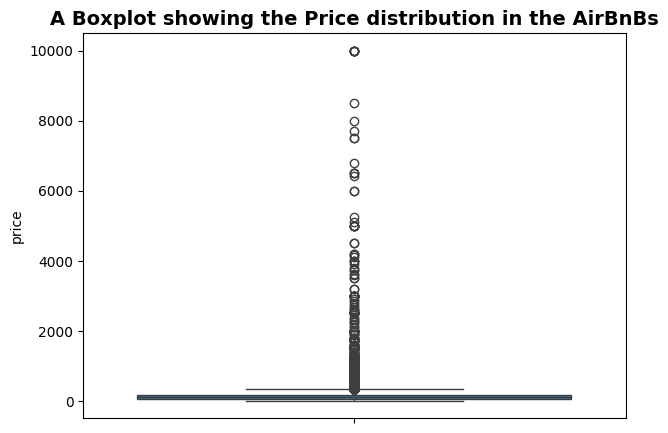

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(df['price'])
plt.title('A Boxplot showing the Price distribution in the AirBnBs', weight = 'bold', size = 14)
plt.show()

In [ ]:
#Identifying the number of Outliers


Columns = df[['minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'price']]

for i in Columns.columns:

  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1

  lower_bound = Q1 - IQR*1.5
  upper_bound = Q3 + IQR*1.5

  outliers = df[(df[i] <= lower_bound) | (df[i] >= upper_bound)]

len(outliers)

2977

There are 2977 outliers

In [ ]:
#Removing the outliers

df = df.copy()

df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

df.shape

(45912, 18)

The outliers have been removed and now the dataset has 45912 rows compared to the original 48884 rows.

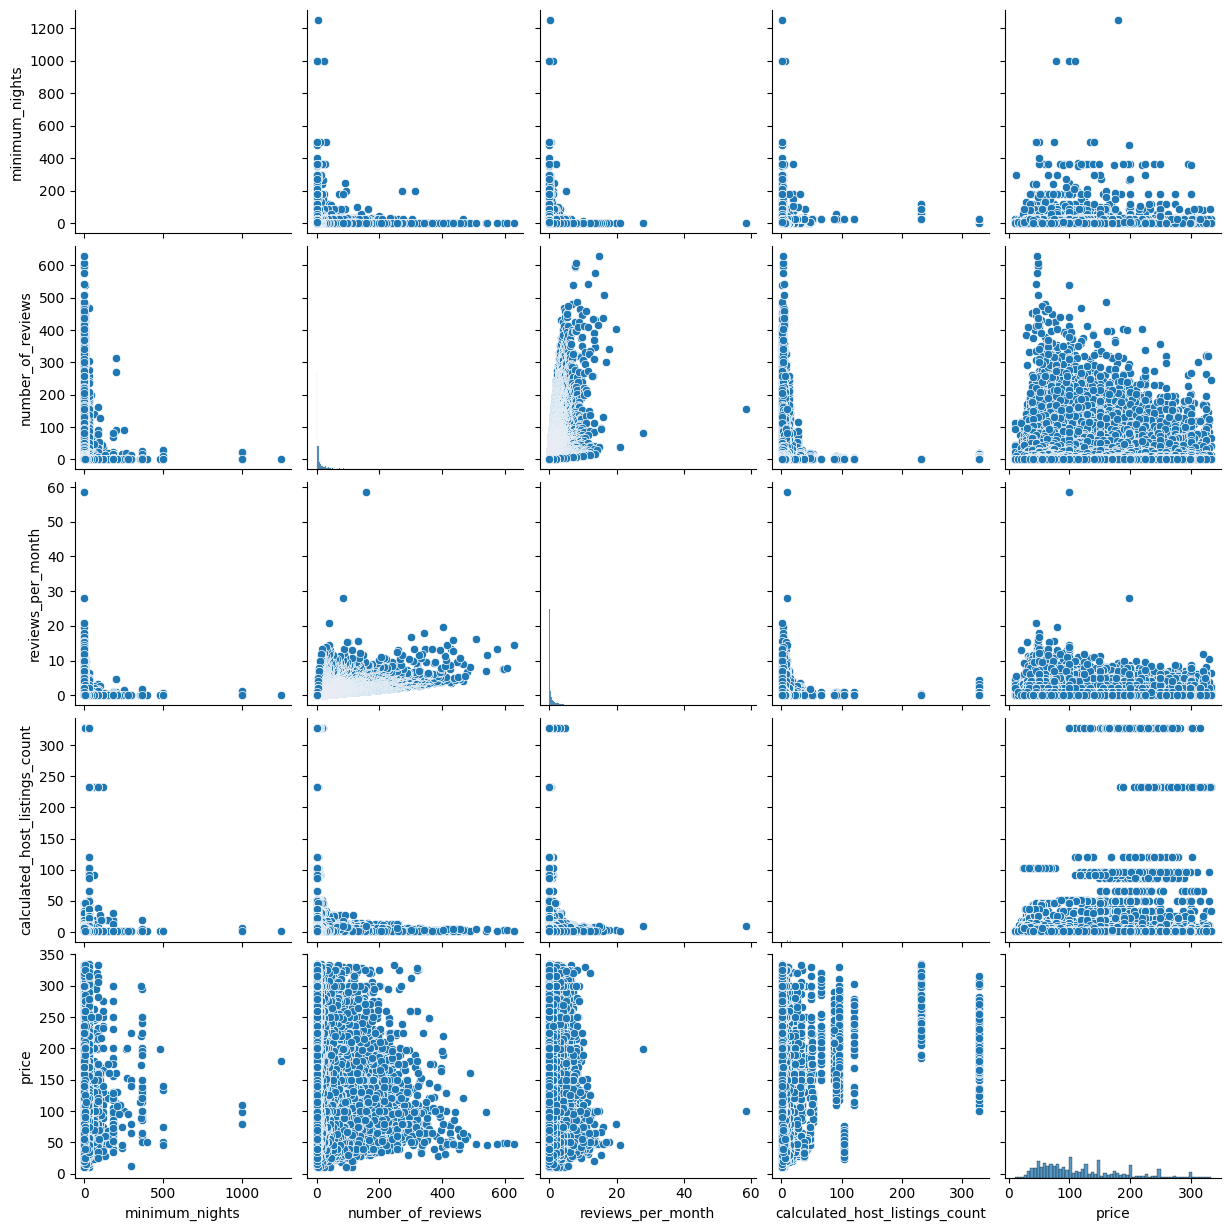

In [ ]:
#Pairplots


Columns = df[['minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'price']]

sns.pairplot(Columns)
plt.show()

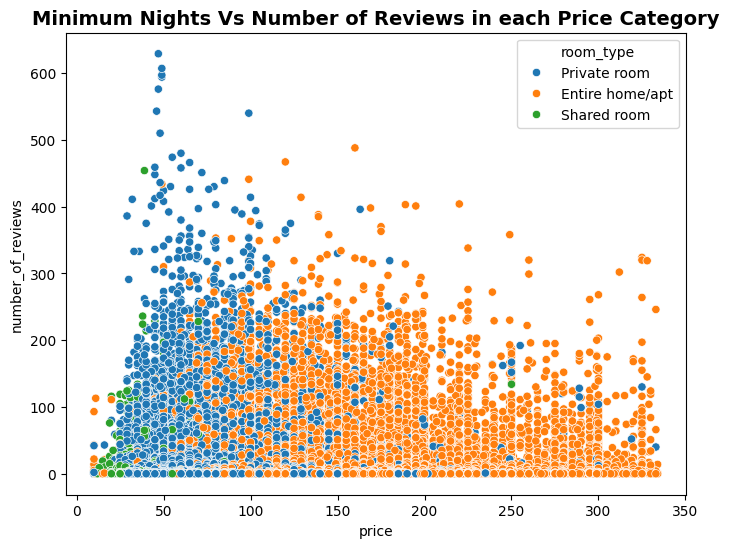

In [ ]:
#Scatterplots

plt.figure(figsize = (8,6))
sns.scatterplot(x = df['price'], y = df['number_of_reviews'], hue = df['room_type'])
plt.title('Minimum Nights Vs Number of Reviews in each Price Category', size = 14, weight = 'bold')
plt.show()

- Shared rooms have the least prices and number of reviews, Entire Home/ Apartments have the highest prices although  medium to low number of reviews, and private rooms have low prices but medium to high number of reviews.

<Figure size 800x600 with 0 Axes>

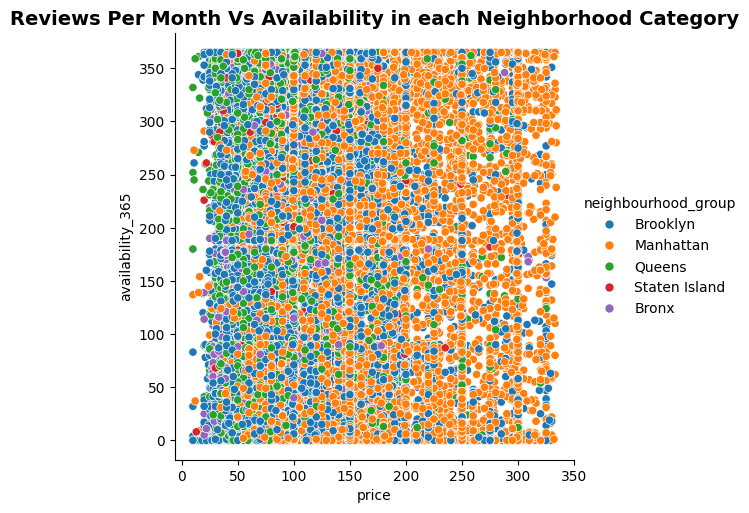

In [ ]:
plt.figure(figsize = (8,6))
sns.relplot(x = df['price'], y = df['availability_365'], hue = df['neighbourhood_group'])
plt.title('Reviews Per Month Vs Availability in each Neighborhood Category', size = 14, weight = 'bold')
plt.show()

- Manhattan and Brooklyn are the most represented neighborhoods

<Figure size 800x600 with 0 Axes>

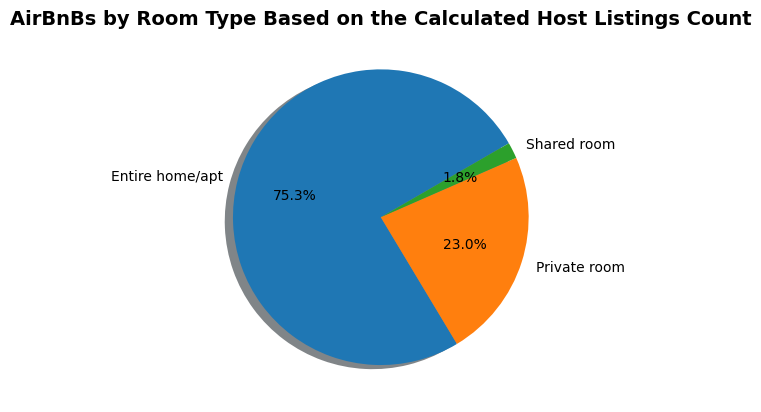

In [ ]:
#Piecharts

grouped_data = df.groupby('room_type')['calculated_host_listings_count'].sum()


labels = grouped_data.index
sizes = grouped_data.values


plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=30)
plt.title('AirBnBs by Room Type Based on the Calculated Host Listings Count', weight = 'bold', size = 14)
plt.show()

Most AirBnBs by the number of calculated Host listings are Entire Homes/ Apartments followed by  Private Rooms then shared rooms.

<Figure size 800x600 with 0 Axes>

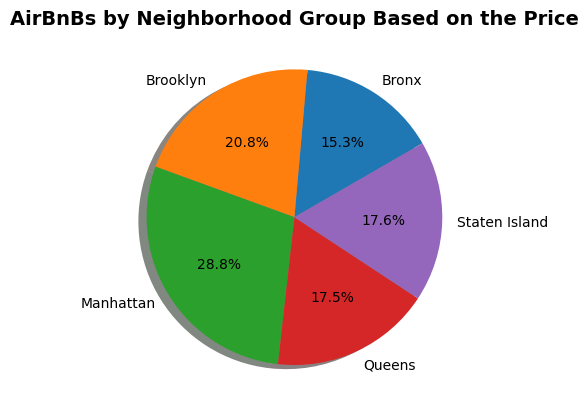

In [ ]:
grouped_data = df.groupby('neighbourhood_group')['price'].mean()


labels = grouped_data.index
sizes = grouped_data.values


plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=30)
plt.title('AirBnBs by Neighborhood Group Based on the Price', weight = 'bold', size = 14)
plt.show()

Manhattan is seen to have the highest prices of AirBnBs at 28.8% with Queens and Bronx having the least prices at 17.5% and 17.6% respectively.

In [ ]:
#Performing label encoding

label_encoder = LabelEncoder()

df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])
df['room_type_encoded'] = label_encoder.fit_transform(df['room_type'])

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year_of_review,month_of_review,room_type_encoded
0,2539,Clean & quiet apt home by the park,2787,John,1,107,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,1
1,2595,Skylit Midtown Castle,2845,Jennifer,2,126,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,93,40.80902,-73.94190,Private room,150,3,0,1970-01-01,0.00,1,365,1970,1,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,0


In [ ]:
#Categorical Mapping for the target variable
x = df['room_type'].unique()

mapping = {category: i for i, category in enumerate(x)}
mapping

{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}

- Private Room has been assigned to 0
- Entire home/apt to 1
- Shared room to 2

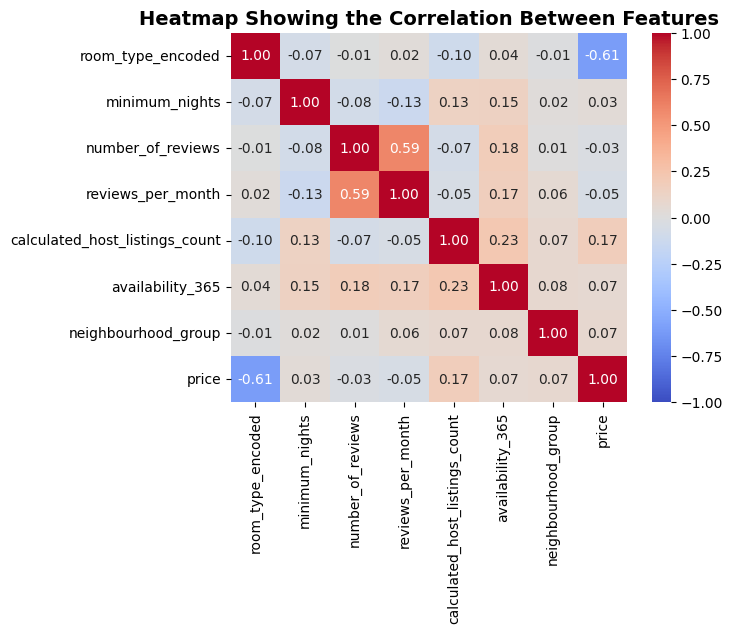

In [ ]:
#Heatmap

columns = df[['room_type_encoded', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group', 'price']]

matrix = columns.corr()

sns.heatmap(matrix, cmap = 'coolwarm', annot = True, fmt = '.2f', vmin = -1, vmax = 1, center = 0)
plt.title('Heatmap Showing the Correlation Between Features', weight = 'bold', size = 14)
plt.show()

- Each of the feature columns are seen to have no correlation to the room type of the AirBnB since most of them range between -0.07 and 0.04, except the price column which has a negative correlation of -0.61.

In [ ]:
#Scaling

scaler = StandardScaler()

df['neighbourhood_group'] = scaler.fit_transform(df[['neighbourhood_group']])
df['minimum_nights'] = scaler.fit_transform(df[['minimum_nights']])
df['number_of_reviews'] = scaler.fit_transform(df[['number_of_reviews']])
df['reviews_per_month'] = scaler.fit_transform(df[['reviews_per_month']])
df['calculated_host_listings_count'] = scaler.fit_transform(df[['calculated_host_listings_count']])
df['availability_365'] = scaler.fit_transform(df[['availability_365']])
df['price'] = scaler.fit_transform(df[['price']])

## Feature Engineering

In [ ]:
X = df[['neighbourhood_group','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365', 'price']]
y = df['room_type_encoded']

In [ ]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

## Getting the models

### 1. Logistic Regression

In [ ]:
log = LogisticRegression(class_weight='balanced')

log.fit(X_train, y_train)

y_predict = log.predict(X_test)

report = classification_report(y_predict, y_test)
print(report)

matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix for the Logistic Regression\n', matrix)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      3970
           1       0.50      0.68      0.58      3260
           2       0.67      0.08      0.15      1953

    accuracy                           0.63      9183
   macro avg       0.64      0.54      0.51      9183
weighted avg       0.64      0.63      0.58      9183


Confusion Matrix for the Logistic Regression
 [[3406  546   18]
 [ 995 2204   61]
 [ 157 1636  160]]


### 2. Decision Tree

In [ ]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)

y_prediction = DT.predict(X_test)

report = classification_report(y_predict, y_test)
print(report)

matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix for the Decision Tree Classifier\n', matrix)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      3970
           1       0.50      0.68      0.58      3260
           2       0.67      0.08      0.15      1953

    accuracy                           0.63      9183
   macro avg       0.64      0.54      0.51      9183
weighted avg       0.64      0.63      0.58      9183


Confusion Matrix for the Decision Tree Classifier
 [[3406  546   18]
 [ 995 2204   61]
 [ 157 1636  160]]


In [ ]:

param_distributions_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


random_search_dt = RandomizedSearchCV(
    estimator=DT,
    param_distributions=param_distributions_dt,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42
)


random_search_dt.fit(X_train, y_train)


print("Decision Tree - RandomizedSearchCV Best Parameters:", random_search_dt.best_params_)
print("Decision Tree - RandomizedSearchCV Best Cross-Validation Score:", random_search_dt.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Decision Tree - RandomizedSearchCV Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}
Decision Tree - RandomizedSearchCV Best Cross-Validation Score: 0.8272481636551904


### 3. Random Forest

In [ ]:
RF = RandomForestClassifier(random_state=42,n_estimators=3)

RF.fit(X_train, y_train)

y_prediction = RF.predict(X_test)

report = classification_report(y_predict, y_test)
print(report)

matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix for the Random Forest Classifier\n', matrix)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      3970
           1       0.50      0.68      0.58      3260
           2       0.67      0.08      0.15      1953

    accuracy                           0.63      9183
   macro avg       0.64      0.54      0.51      9183
weighted avg       0.64      0.63      0.58      9183


Confusion Matrix for the Random Forest Classifier
 [[3406  546   18]
 [ 995 2204   61]
 [ 157 1636  160]]


### 4. Gradient Boosting Classifier

In [ ]:
GB = GradientBoostingClassifier(random_state = 42)

GB.fit(X_train, y_train)

y_predict = GB.predict(X_test)

report = classification_report(y_predict, y_test)
print(report)

matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix for the Gradient Boosting Classifier\n', matrix)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4652
           1       0.84      0.82      0.83      4453
           2       0.26      0.78      0.38        78

    accuracy                           0.84      9183
   macro avg       0.65      0.82      0.69      9183
weighted avg       0.85      0.84      0.84      9183


Confusion Matrix for the Gradient Boosting Classifier
 [[3938  699   15]
 [ 619 3671  163]
 [   1   16   61]]


### 5. XG Boost Classifier

In [ ]:
XG = XGBClassifier()

XG.fit(X_train, y_train)

y_predict = XG.predict(X_test)

report = classification_report(y_predict, y_test)
print(report)

matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix for the XG Boost Classifier\n', matrix)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4622
           1       0.84      0.83      0.84      4466
           2       0.33      0.83      0.47        95

    accuracy                           0.84      9183
   macro avg       0.68      0.84      0.72      9183
weighted avg       0.85      0.84      0.84      9183


Confusion Matrix for the XG Boost Classifier
 [[3939  671   12]
 [ 618 3700  148]
 [   1   15   79]]


- From all the models, Random Forest (tuned), XGBoost and Gradient Boosting models are the best performing model with accuracies of 0.84.
- In terms of the F1 Score, XG Boost model has the best score in all three classes although class 2 has a low score of 0.47 as a result of a low precision

### Feature Importance.

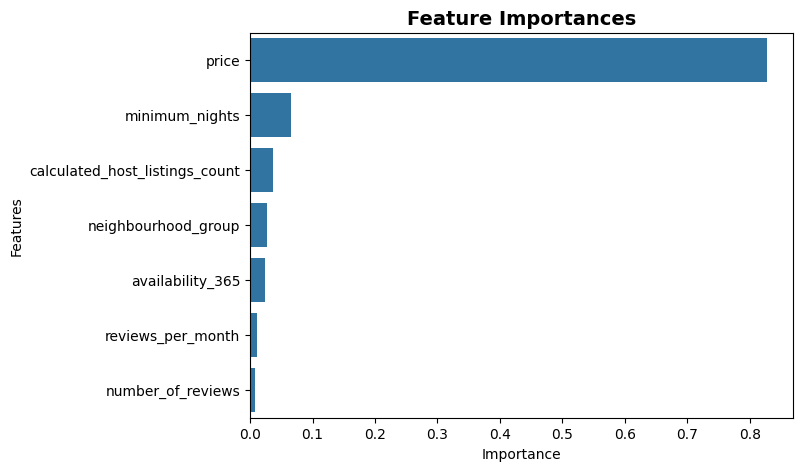

In [ ]:
#Gradient Boosting classifier

importances = GB.feature_importances_

importance_df = pd.DataFrame({
    'Features': X.columns,
    'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

#Plotting the importances

plt.figure(figsize = (7,5))
plt.title('Feature Importances', weight = 'bold', size = 14)
sns.barplot(x = importance_df['Importance'], y = importance_df['Features'])
plt.show()

# Observation
The price column is seen to be the one with the highest influence in determining the accuracy of the gradient boost model.